====================================Visualize và đặt câu hỏi========================================

In [1]:
#import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pip install geopandas nếu chưa cài đặt
import geopandas as gpd
import json

In [2]:
df = pd.read_csv("../Data/data_processed.csv")
df.head(2000)

,Country,Year,Fossil fuels (TWh),Coal (TWh),Oil (TWh),Gas (TWh),Renewables (TWh),Hydropower (TWh),Solar (TWh),Wind (TWh)
0,Algeria,2000,300.0,5.64,103.13,191.01,0.0,0.0,0.0,0.0
1,Argentina,2000,595.0,7.51,264.94,322.97,86.0,84.0,0.0,0.0
2,Australia,2000,1253.0,591.66,455.98,205.55,52.0,49.0,0.0,0.0
3,Austria,2000,262.0,42.47,141.75,78.21,129.0,124.0,0.0,0.0
4,Azerbaijan,2000,128.0,0.00,74.69,52.83,5.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1812,United Kingdom,2022,1520.0,58.72,741.04,719.80,393.0,14.0,36.0,209.0
1813,United States,2022,21595.0,2741.22,10041.68,8812.12,3015.0,674.0,538.0,1145.0
1814,Uzbekistan,2022,572.0,28.68,60.05,483.18,14.0,14.0,0.0,0.0
1815,Venezuela,2022,440.0,0.42,147.72,291.78,174.0,174.0,0.0,0.0


**Câu hỏi 1:Ứng với mỗi loại năng lượng, thì mức độ tiêu thụ của các nước nào là nhiều và thuộc top 10 trong thế kỷ 21?**
- Trả lời câu hỏi giúp chúng ta: 
    + Có cái nhìn tổng quan về mức độ tiêu thụ năng lượng của top 10 quốc gia đó và so sánh mức độ tiêu thụ của giữa các quốc gia đó.
    + Ứng với mỗi loại năng lượng thì ta thấy các quốc gia thuộc top 10 đó, ưu tiên sử dụng năng lượng hóa thạch hơn hay là năng lượng tái tạo nhiều hơn, hay là sử dụng cả hai mới đáp ứng đủ nhu cầu tiêu dùng. Từ đó cho thấy dự đoán được hướng đi của họ là ưu tiên sử dụng năng lượng sạch hay không?
    + Dự đoán về tình hình phát triển kinh tế (sử dụng năng lượng càng nhiều thì kinh tế có thể càng phát triển), dân số (dân số cao thì nhu cầu tiêu thụ năng lượng cũng cao).
- Cách để trả lời câu hỏi: Từ thuộc tính tiêu thụ năng lượng của từng loại năng lượng, chúng ta nhóm dataframe theo tên các quốc gia rồi sau đó chúng ta tính tổng tương ứng của từng quốc gia đó và lấy ra top10 nước sử dụng nhiều nhất để vẽ biểu đồ.

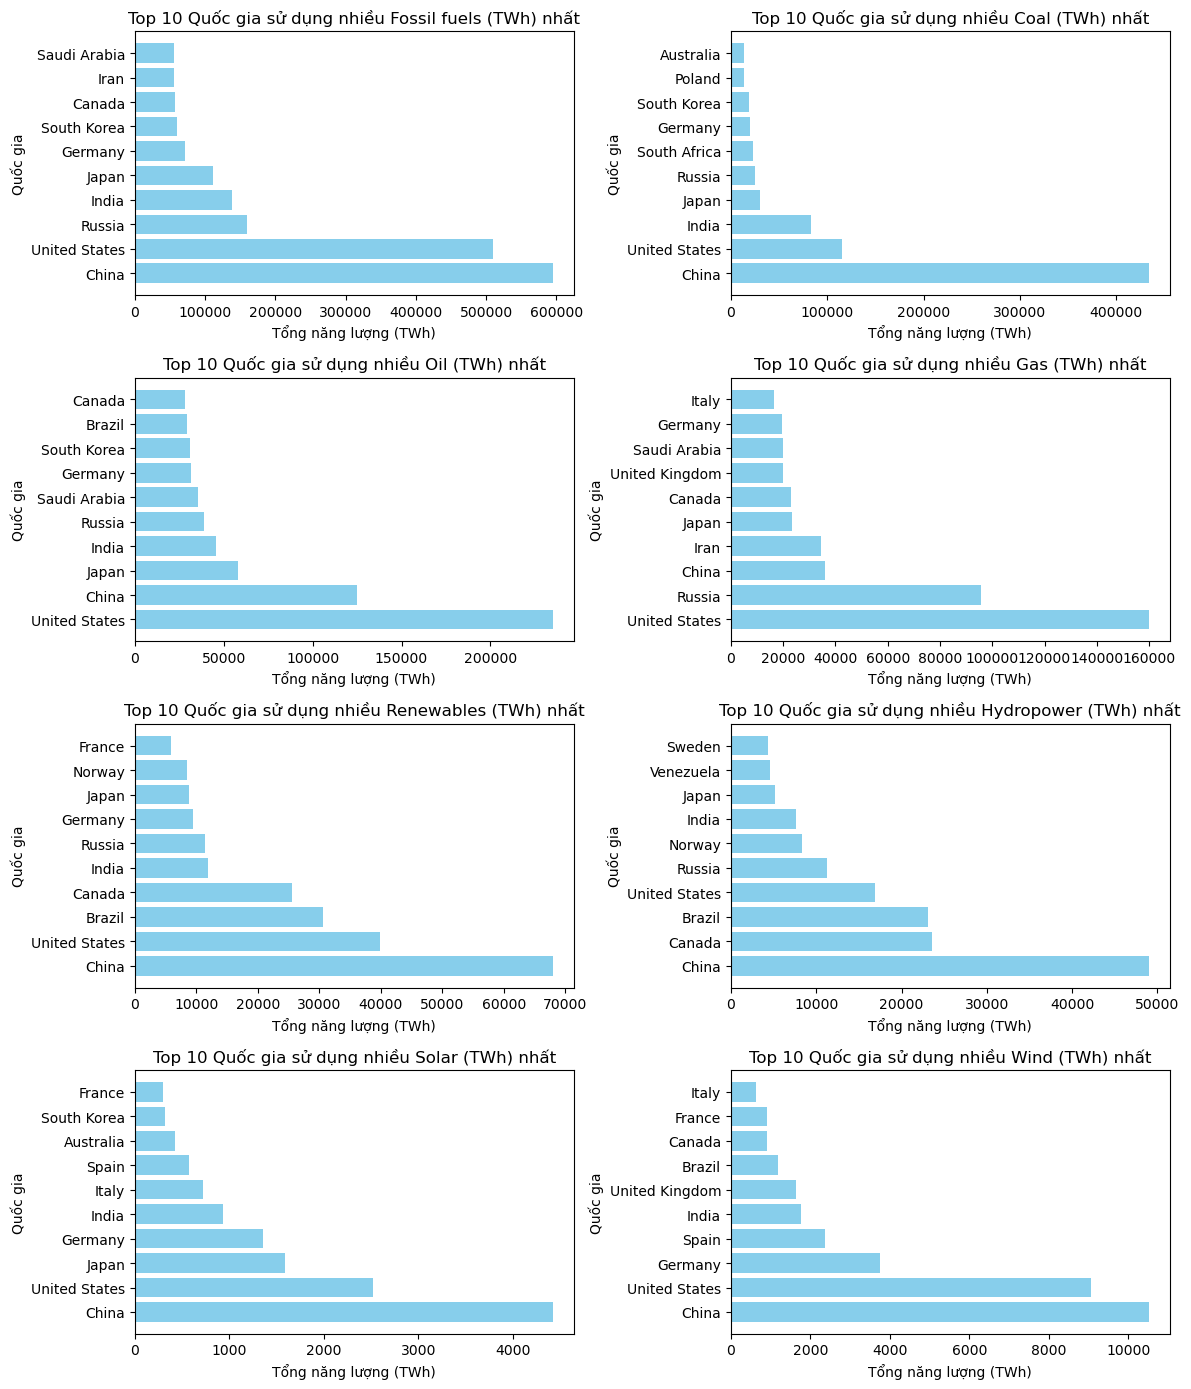

In [3]:
#Lấy các cột từ cột số 2 trở đi chừa cột tên nước và năm ra
columns = df.columns[2:]

num_plots = len(columns)
#chia thành 4 hàng, mỗi hàng hai đồ thị
num_rows = 4
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 14))

# Lặp qua từng loại năng lượng và vẽ biểu đồ cho top 10 quốc gia
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols

    type_energy_by_country = df.groupby('Country')[column].sum()
    top_10_countries = type_energy_by_country.nlargest(10)

    axs[row, col].barh(top_10_countries.index, top_10_countries.values, color='skyblue')
    axs[row, col].set_title(f'Top 10 Quốc gia sử dụng nhiều {column} nhất')
    axs[row, col].set_xlabel('Tổng năng lượng (TWh)')
    axs[row, col].set_ylabel('Quốc gia')


plt.tight_layout()
plt.show()

**Câu hỏi 2:Mức độ sử dụng các loại năng lượng trên thế giới thay đổi như thế nào qua các năm?**
- Trả lời câu hỏi giúp chúng ta: 
    + Biết được mức độ sử dụng các loại năng lượng qua từng năm.
    + Từ đó biết được những biến động ảnh hưởng đến mức tiêu thụ các loại năng lượng. 
    + Phần nào đó dự đoán được xu thế sử dụng năng lượng thay đổi như thế nào.
- Cách để trả lời câu hỏi: 
    + So sánh sự thay đổi (tăng, giảm) mức độ tiêu thụ các loại năng lượng.
    + So sánh mức độ tăng trưởng (nhanh, chậm, ổn định) của mức độ tiêu thụ các loại năng lượng.
    + Quan sát mức năng lượng tiêu thụ của các loại năng lượng (cao,thấp) trong cùng một nhóm (hóa thạch,tái tạo).
    + Quan sát các điểm bất thường trên đồ thị của các loại năng lượng.

In [4]:
list_year =[]
list_fossil_fuels =[]
list_renewables = []
list_coal =[]
list_oil =[]
list_gas=[]
list_hydropower=[]
list_solar =[]
list_wind =[]

for y in range (df['Year'].min(), df['Year'].max()+1):
    fossil_fuels =0
    renewables = 0
    coal =0
    oil =0
    gas=0
    hydropower=0
    solar =0
    wind =0
    list_year.append(y)
    for i in range (0 , len(df)):
        if (df['Year'][i] == y):
           fossil_fuels = fossil_fuels + df['Fossil fuels (TWh)'][i]
           renewables = renewables + df['Renewables (TWh)'][i]
           coal = coal + df['Coal (TWh)'][i]
           oil = oil+ df['Oil (TWh)'][i]
           gas = gas+ df['Gas (TWh)'][i]
           hydropower = hydropower+df['Hydropower (TWh)'][i]
           solar = solar +df['Solar (TWh)'][i]
           wind = wind +df['Wind (TWh)'][i] 

    list_fossil_fuels.append(fossil_fuels)
    list_renewables.append(renewables)
    list_coal.append(coal)
    list_oil.append(oil)
    list_gas.append(gas)
    list_hydropower.append(hydropower)
    list_solar.append(solar)
    list_wind.append(wind)

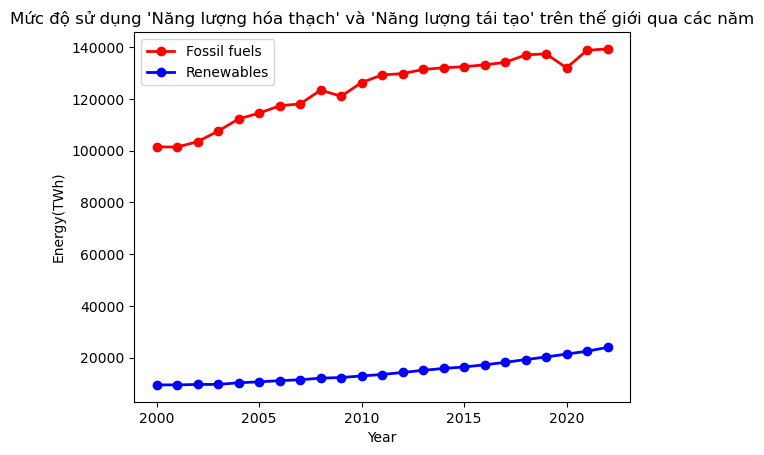

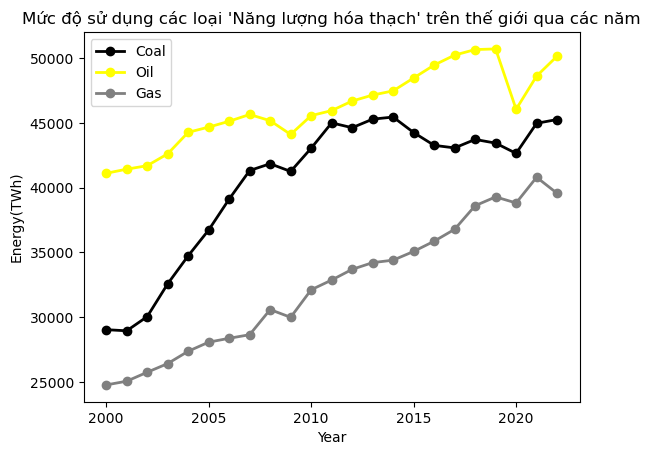

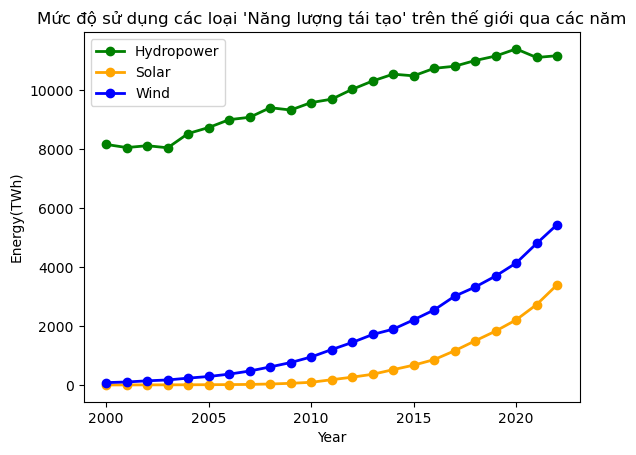

In [5]:
#Mức độ sử dụng năng lượng hóa thạch và năng lượng tái tạo trên thế giới qua các năm
plt.plot(list_year, list_fossil_fuels, color='red', linewidth=2, marker='o', label='Fossil fuels')
plt.plot(list_year, list_renewables, color='blue', linewidth=2, marker='o', label='Renewables')

plt.xlabel('Year')
plt.ylabel('Energy(TWh)')
plt.legend()
plt.title("Mức độ sử dụng 'Năng lượng hóa thạch' và 'Năng lượng tái tạo' trên thế giới qua các năm")

plt.show()

#Mức độ sử dụng các loại năng lượng hóa thạch trên thế giới qua các năm
plt.plot(list_year, list_coal, color='black', linewidth=2, marker='o', label='Coal')
plt.plot(list_year, list_oil, color='yellow', linewidth=2, marker='o', label='Oil')
plt.plot(list_year, list_gas, color='grey', linewidth=2, marker='o', label='Gas')

plt.xlabel('Year')
plt.ylabel('Energy(TWh)')
plt.legend()
plt.title("Mức độ sử dụng các loại 'Năng lượng hóa thạch' trên thế giới qua các năm")

plt.show()

#Mức độ sử dụng các loại năng lượng tái tạo trên thế giới qua các năm
plt.plot(list_year, list_hydropower, color='green', linewidth=2, marker='o', label='Hydropower')
plt.plot(list_year, list_solar, color='orange', linewidth=2, marker='o', label='Solar')
plt.plot(list_year, list_wind, color='blue', linewidth=2, marker='o', label='Wind')

plt.xlabel('Year')
plt.ylabel('Energy(TWh)')
plt.legend()
plt.title("Mức độ sử dụng các loại 'Năng lượng tái tạo' trên thế giới qua các năm")

plt.show()

- Câu hỏi 3: Ứng với loại năng lượng Fossil Fuels và năng lượng Renewable thì mức độ phân bố lượng sử dụng năng lượng trong thế kỉ 21 trên thế giới như thế nào của các nước ?
- Trả lời câu hỏi giúp chúng ta: 
    + Có cái nhìn tổng quan sự phân bố sử dụng hai loại năng lượng trên giữa các nước trên thế giới, và giữa các châu lục.
    + So sánh mức độ nhiều ít giữa hai loại năng lượng của cùng một nước (do đó cần vẽ hai biểu đồ chung tỉ lệ).
    + Nhận xét về mức tiêu thụ năng lượng nhiều tập trung chủ yếu ở khu vực nào, châu lục nào, từ đó dự đoán được khả năng, tiềm lực về kinh tế cũng như là dân số của nước đó hay châu lục đó.
- Cách để trả lời câu hỏi: Từ thuộc tính tiêu thụ năng lượng của từng loại Fossil Fuel và Renewable, ta dựa vào file coord.json để tìm ra vị trí latitude và longtitude của nước đó, sau đó vẽ các vòng tròn thể hiện mức độ tiêu thụ năng lượng (chú ý là vẽ hai loại năng lượng cùng tỉ lệ để so sánh trong cùng 1 nước mức độ tiêu thụ giữa Fossil Fuel và Renewable)

/var/folders/vk/8tpzjxrs7155gkjf76mz_zgr0000gn/T/ipykernel_12057/2844451929.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


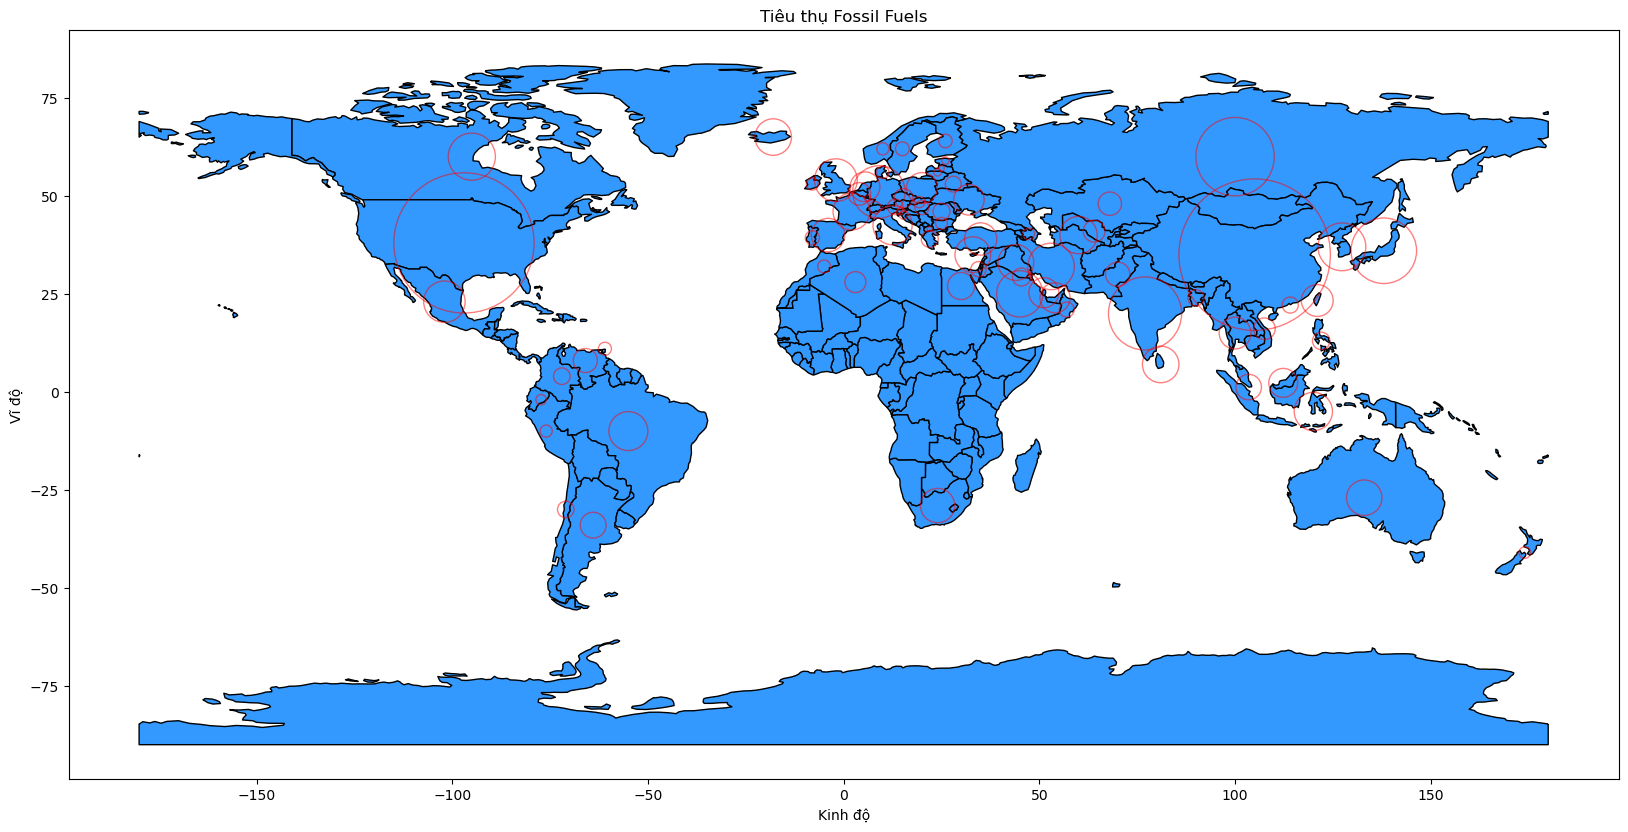

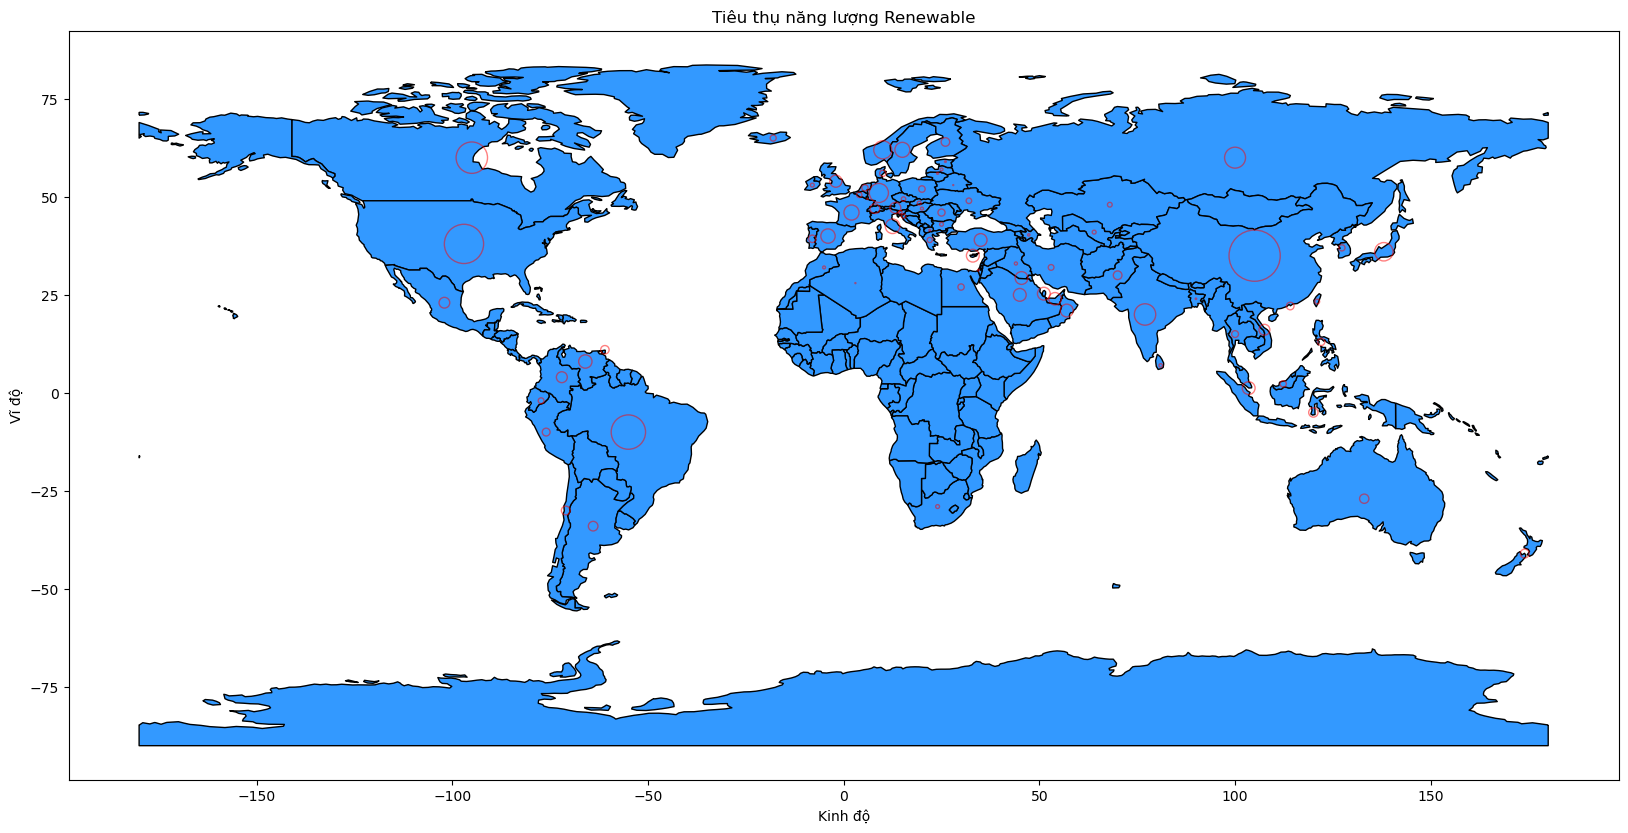

In [7]:
#Câu hỏi 3:
#pip install geopandas nếu chưa cài đặt

# Đọc dữ liệu từ tập tin "coord.json" chứa thông tin vị trí của các quốc gia
with open('../Data/coord.json', 'r') as f:
    coord_data = json.load(f)

# Tạo GeoDataFrame từ dữ liệu vị trí để tí gộp lại tương ứng với quốc gia ở dưới
gdf = gpd.GeoDataFrame({
    'Country': list(coord_data['lat'].keys()),
    'lat': list(coord_data['lat'].values()),
    'long': list(coord_data['long'].values())
})
# gdf.head(100)

#Lấy dữ liệu bản đồ thế giới từ thư viện
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#====================================================================================
#Lấy ra tổng năng lượng fossil_fuels của nước tiêu thụ trong thế kỉ 21
fossil_fuels_energy_by_country = df.groupby('Country')['Fossil fuels (TWh)'].sum()

# Kết hợp thông tin vị trí với lượng năng lượng fossil_fuels tiêu thụ 
merged_using_fossil_fuels_df = gdf.merge(fossil_fuels_energy_by_country, how='right', left_on='Country', right_on='Country')

valid_using_fossil_fuels_df = merged_using_fossil_fuels_df.dropna()

#valid_using_fossil_fuels_df.info()

#Vẽ biểu đồ sử dụng Fossil_fuels 
fig, ax1 = plt.subplots(figsize=(20, 15))
world.plot(ax=ax1, color='#3399FF', edgecolor='black')
for index, row in valid_using_fossil_fuels_df.iterrows():
    ax1.scatter(row['long'], row['lat'], s=row['Fossil fuels (TWh)'] / 50, alpha=0.5,
                    color='none', edgecolor='red', label='Total Cases')
    
plt.title('Tiêu thụ Fossil Fuels')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.show()
#====================================================================================
#Lấy ra tổng năng lượng renewable của nước tiêu thụ trong thế kỉ 21
renewable_energy_by_country = df.groupby('Country')['Renewables (TWh)'].sum()

# Kết hợp thông tin vị trí với lượng năng lượng tiêu thụ 
merged_using_renewable_df = gdf.merge(renewable_energy_by_country, how='right', left_on='Country', right_on='Country')

valid_using_renewable_fuels_df = merged_using_renewable_df.dropna()


#Vẽ biểu đồ sử dụng Fossil_fuels 
fig2, ax2 = plt.subplots(figsize=(20, 15))
world.plot(ax=ax2, color='#3399FF', edgecolor='black')
for index, row in valid_using_renewable_fuels_df.iterrows():
    ax2.scatter(row['long'], row['lat'], s=row['Renewables (TWh)'] / 50, alpha=0.5,
                    color='none', edgecolor='red')
    
plt.title('Tiêu thụ năng lượng Renewable')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.show()
